In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 한글 폰트
import matplotlib
import matplotlib.font_manager as fm

# 1.
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = fm.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family=font)

# 2.
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
# data load
data = pd.read_csv('전체데이터통합.CSV', encoding='cp949')

In [4]:
df = data.copy()
df.head()

,base_date,city,emd_nm,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,...,use_amt농축수산물,use_amt마트/슈퍼마켓,평균기온(°C),일강수량(mm),평균 상대습도(%),평균 현지기압(hPa),합계 일사량(MJ/m2),일 최심신적설(cm),평균 전운량(1/10),배출량
0,2018-01-01,서귀포시,남원읍,11030.2331,9791.3235,11498.2617,10650.5811,13324.2924,10954.4914,15372.8110,...,2199680,24828201,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,1239600
1,2018-01-01,서귀포시,대륜동,17647.5285,10160.5833,15216.9486,10298.1857,14152.0528,11361.8229,12541.6031,...,354993,37971731,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,1717700
2,2018-01-01,서귀포시,대정읍,12538.2881,7792.5662,14360.4369,6043.2109,16053.7231,8710.5446,19530.3550,...,2730942,37142481,6.1,0.0,58.4,1018.5,7.72,0.0,0.0,1264950
3,2018-01-01,서귀포시,대천동,10539.1926,7307.2766,10214.4234,7677.3523,7645.1222,8157.7877,7511.4389,...,687498,39231391,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,1765600
4,2018-01-01,서귀포시,동홍동,20141.3526,7741.1595,22060.7555,8331.2173,28043.7082,8607.6880,31639.5584,...,2572840,69274797,6.1,0.0,58.9,1020.3,0.00,0.0,0.0,4165050


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48421 entries, 0 to 48420
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   base_date       48421 non-null  object 
 1   city            48421 non-null  object 
 2   emd_nm          48421 non-null  object 
 3   0여성notvisit     48421 non-null  float64
 4   0여성visit        48421 non-null  float64
 5   0남성notvisit     48421 non-null  float64
 6   0남성visit        48421 non-null  float64
 7   10여성notvisit    48421 non-null  float64
 8   10여성visit       48421 non-null  float64
 9   10남성notvisit    48421 non-null  float64
 10  10남성visit       48421 non-null  float64
 11  20여성notvisit    48421 non-null  float64
 12  20여성visit       48421 non-null  float64
 13  20남성notvisit    48421 non-null  float64
 14  20남성visit       48421 non-null  float64
 15  30여성notvisit    48421 non-null  float64
 16  30여성visit       48421 non-null  float64
 17  30남성notvisit    48421 non-null 

In [6]:
df.shape

(48421, 54)

# 분석 변수 선택

In [12]:
# 유동인구, 카드소비 데이터
df1 = df.iloc[:, 3:46]
df1 = df1.drop(columns = 'dayoff', axis=1)
df1.head()

,0여성notvisit,0여성visit,0남성notvisit,0남성visit,10여성notvisit,10여성visit,10남성notvisit,10남성visit,20여성notvisit,20여성visit,...,80여성notvisit,80여성visit,80남성notvisit,80남성visit,장기체류외국인,단기체류외국인,use_amt배달,use_amt식품,use_amt농축수산물,use_amt마트/슈퍼마켓
0,11030.2331,9791.3235,11498.2617,10650.5811,13324.2924,10954.4914,15372.8110,12625.9706,8269.5504,15354.9535,...,9313.4883,3581.6028,5048.0583,1258.6118,3217.1185,3552.3268,644192,16392477,2199680,24828201
1,17647.5285,10160.5833,15216.9486,10298.1857,14152.0528,11361.8229,12541.6031,12196.2891,11551.7730,15218.0249,...,4756.9182,3304.4581,2626.1564,1394.6639,2926.3732,1347.0481,396728,3178292,354993,37971731
2,12538.2881,7792.5662,14360.4369,6043.2109,16053.7231,8710.5446,19530.3550,7145.9647,10281.0872,8805.2719,...,13545.1496,2777.5342,7111.8299,937.3813,5844.0823,1988.0280,512113,1413442,2730942,37142481
3,10539.1926,7307.2766,10214.4234,7677.3523,7645.1222,8157.7877,7511.4389,9116.7211,6311.3124,9489.8313,...,2479.1482,2655.9199,1595.5814,871.3387,2538.0331,1072.5069,162030,2611973,687498,39231391
4,20141.3526,7741.1595,22060.7555,8331.2173,28043.7082,8607.6880,31639.5584,9830.7972,13223.8723,9832.0299,...,7659.1228,2311.5113,2373.9445,1252.3303,3408.0341,1516.3274,421916,2994364,2572840,69274797


In [15]:
df1.shape, df['배출량'].shape

((48421, 42), (48421,))

In [16]:
from sklearn.model_selection import train_test_split

X = df1
y = df['배출량']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (38736, 42) (38736,)
Test Data :  (9685, 42) (9685,)


# 모델 생성 및 평가

## 1. Linear Model

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

### 1-1. Multiple Regression

In [18]:
%%time

# Modeling
MR = LinearRegression(normalize = True, n_jobs = -1)

MR.fit(X_train, y_train)

Wall time: 73.8 ms


LinearRegression(n_jobs=-1, normalize=True)

In [25]:
# Evaluation
mse = mean_squared_error(y_test, MR.predict(X_test))
np.sqrt(mse)

608555.3935105848

### 1-2. Ridge Regression

In [22]:
%%time

RG = Ridge(normalize=True, alpha=0.3, solver='cholesky')

RG.fit(X_train, y_train)

Wall time: 51.9 ms


Ridge(alpha=0.3, normalize=True, solver='cholesky')

In [26]:
# Evaluation
mse = mean_squared_error(y_test, RG.predict(X_test))
np.sqrt(mse)

766039.505274679

### 1-3. Lasso Regression

In [27]:
%%time

LS = Lasso(normalize=True, alpha=0.2)

LS.fit(X_train, y_train)

Wall time: 1.97 s


Lasso(alpha=0.2, normalize=True)

In [28]:
# Evaluation
mse = mean_squared_error(y_test, LS.predict(X_test))
np.sqrt(mse)

608675.5977782004

### 1-4. ElasticNet Regression

In [29]:
%%time

EN = ElasticNet(normalize=True, 
                alpha=0.001, 
                l1_ratio=0.7)

EN.fit(X_train, y_train)

Wall time: 119 ms


ElasticNet(alpha=0.001, l1_ratio=0.7, normalize=True)

In [30]:
# Evaluation
mse = mean_squared_error(y_test, EN.predict(X_test))
np.sqrt(mse)

1167296.2353448023

## 2. Tree Regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### 2-1. Decision Tree Regressor

In [35]:
%%time

DTR = DecisionTreeRegressor(max_depth=5, 
                            criterion='mse', 
                            random_state=42)

DTR.fit(X_train, y_train)

Wall time: 961 ms


DecisionTreeRegressor(max_depth=5, random_state=42)

In [34]:
# Evaluation
mse = mean_squared_error(y_test, DTR.predict(X_test))
np.sqrt(mse)

591862.588569143

In [44]:
# Feature Importance
DTR.feature_importances_

array([0.00000000e+00, 2.29300113e-03, 8.02715968e-03, 0.00000000e+00,
       6.94690326e-01, 1.73449411e-03, 3.06602998e-02, 7.41761715e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.80572402e-04,
       6.16237939e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.11165322e-01, 0.00000000e+00, 2.35449517e-03, 4.49216563e-04,
       1.62299307e-03, 0.00000000e+00, 7.61988098e-03, 1.33864254e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.76203372e-03, 1.09228252e-03, 1.10847059e-03, 0.00000000e+00,
       0.00000000e+00, 3.18843236e-02, 9.81256540e-04, 2.09957071e-04,
       0.00000000e+00, 9.39211315e-02])

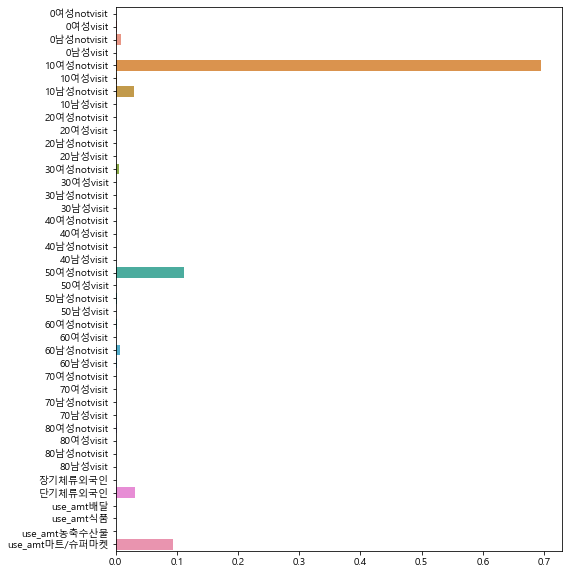

In [40]:
plt.figure(figsize=(8, 10))
sns.barplot(DTR.feature_importances_, df1.columns)
plt.show()

### 2-2. Random Forest Regressor

In [42]:
%%time

RF = RandomForestRegressor(n_estimators=1000, 
                           max_features=3, 
                           max_depth=1, 
                           criterion='mse', 
                           n_jobs=-1, 
                           random_state=42)

RF.fit(X_train, y_train)

Wall time: 7.54 s


RandomForestRegressor(max_depth=1, max_features=3, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [43]:
# Evaluation
mse = mean_squared_error(y_test, RF.predict(X_test))
np.sqrt(mse)

1137152.90927909

In [45]:
# Feature Importance
RF.feature_importances_

array([0.034, 0.028, 0.029, 0.025, 0.076, 0.011, 0.057, 0.022, 0.067,
       0.01 , 0.041, 0.016, 0.047, 0.002, 0.056, 0.002, 0.062, 0.009,
       0.054, 0.018, 0.053, 0.006, 0.06 , 0.016, 0.047, 0.002, 0.021,
       0.012, 0.034, 0.004, 0.004, 0.004, 0.005, 0.   , 0.001, 0.002,
       0.   , 0.   , 0.001, 0.018, 0.001, 0.043])

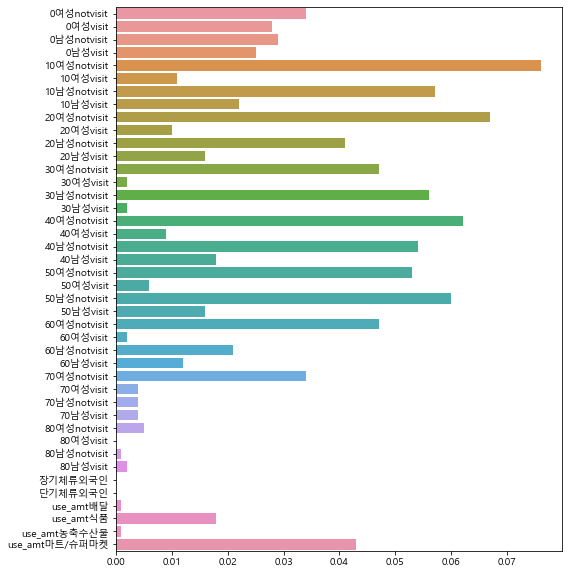

In [47]:
plt.figure(figsize=(8, 10))
sns.barplot(RF.feature_importances_, df1.columns)
plt.show()

### 2-3. GBM Regressor

In [48]:
%%time

GBR = GradientBoostingRegressor(loss = 'ls', 
                                n_estimators=1000, 
                                learning_rate=0.0001, 
                                criterion='mse', 
                                max_features=5, 
                                max_depth=1, 
                                random_state=42)

GBR.fit(X_train, y_train)

Wall time: 32.5 s


GradientBoostingRegressor(criterion='mse', learning_rate=0.0001, max_depth=1,
                          max_features=5, n_estimators=1000, random_state=42)

In [49]:
# Evaluation
mse = mean_squared_error(y_test, GBR.predict(X_test))
np.sqrt(mse)

1846545.1690169806

In [50]:
# Feature Importance
GBR.feature_importances_

array([0.023013  , 0.00227477, 0.01900885, 0.01142417, 0.1275024 ,
       0.00497202, 0.08883982, 0.00827056, 0.12033117, 0.00064983,
       0.05901578, 0.00603883, 0.03919302, 0.        , 0.03949654,
       0.00133411, 0.07882945, 0.00272326, 0.06412587, 0.00278148,
       0.10824802, 0.00275603, 0.05989378, 0.00358877, 0.03448327,
       0.        , 0.01510934, 0.        , 0.023043  , 0.        ,
       0.        , 0.00058723, 0.00261279, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00490935,
       0.        , 0.04494354])

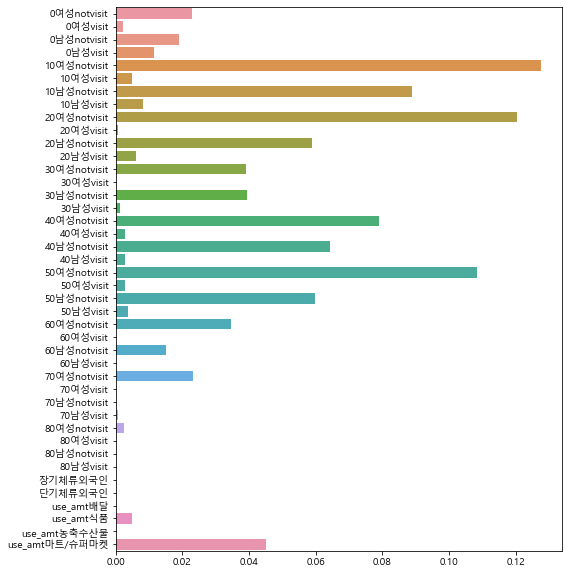

In [51]:
plt.figure(figsize=(8, 10))
sns.barplot(GBR.feature_importances_, df1.columns)
plt.show()

### 2-4. AdaBoost Regressor

In [52]:
%%time

ABR = AdaBoostRegressor(loss='square', 
                        n_estimators=500, 
                        learning_rate=0.0001, 
                        random_state=42)

ABR.fit(X_train, y_train)

Wall time: 6min 33s


AdaBoostRegressor(learning_rate=0.0001, loss='square', n_estimators=500,
                  random_state=42)

In [54]:
# Evaluation
mse = mean_squared_error(y_test, ABR.predict(X_test))
np.sqrt(mse)

770069.9901028468

In [55]:
# Feature Importance
ABR.feature_importances_

array([0.        , 0.        , 0.00933221, 0.        , 0.74423005,
       0.        , 0.03238404, 0.        , 0.00294071, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11186715, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.09924583])

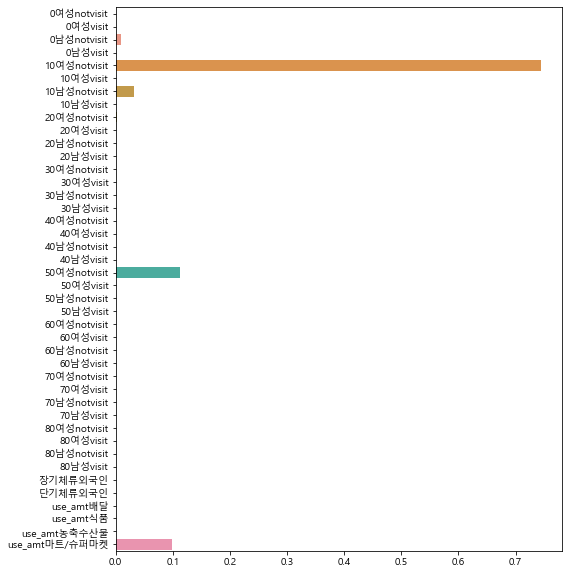

In [56]:
plt.figure(figsize=(8, 10))
sns.barplot(ABR.feature_importances_, df1.columns)
plt.show()

### 2-5. XGBoost Regressor

In [53]:
%%time

XGB = XGBRegressor(booster = 'gblinear', 
                   n_esimators=1000, 
                   learning_rate=0.4, 
                   reg_lambda=2.0, 
                   n_jobs=-1, 
                   random_state=42)

XGB.fit(X_train, y_train)

[10:37:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 955 ms


XGBRegressor(booster='gblinear', learning_rate=0.4, n_esimators=1000, n_jobs=-1,
             random_state=42, reg_lambda=2.0)

In [57]:
# Evaluation
mse = mean_squared_error(y_test, XGB.predict(X_test))
np.sqrt(mse)

667198.9846471931

In [68]:
# Feature Importance

In [ ]:
# plt.figure(figsize=(8, 10))
# sns.barplot('XGB.feature_importances_?', df1.columns)
# plt.show()

### 2-6. LightGBM Regressor

In [69]:
%%time

LGB = LGBMRegressor(linear_tree=True, 
                   boosting_type='gbdt', 
                   objective='regression', 
                   importance_type='gain',
 
                   n_estimators=1000, 
                   learning_rate=0.001, 
                   max_depth=10, 
                   n_jobs=-1)

LGB.fit(X_train, y_train)

Wall time: 14.8 s


LGBMRegressor(importance_type='gain', learning_rate=0.001, linear_tree=True,
              max_depth=10, n_estimators=1000, objective='regression')

In [70]:
# Evaluation
mse = mean_squared_error(y_test, LGB.predict(X_test))
np.sqrt(mse)

861589.3725825548

In [71]:
# Feature Importance
LGB.feature_importances_

array([1.33555191e+16, 1.22799012e+17, 1.06012377e+18, 3.21587269e+15,
       4.25179866e+19, 1.27812934e+17, 1.34869199e+18, 3.83679503e+14,
       1.05326390e+16, 2.59957077e+16, 1.35661650e+16, 2.92060267e+16,
       1.75852968e+17, 2.39866832e+16, 5.05881360e+16, 1.17607212e+17,
       4.06357059e+16, 0.00000000e+00, 1.79910779e+17, 0.00000000e+00,
       6.49700891e+18, 2.31866581e+15, 4.37210796e+16, 6.64121736e+15,
       8.39970433e+16, 1.28602160e+16, 3.18952770e+17, 1.36251059e+17,
       1.85629860e+17, 2.41124735e+16, 1.83806287e+17, 7.19350748e+15,
       1.12994734e+17, 1.30815255e+17, 1.17953401e+17, 2.48759683e+16,
       8.47223723e+16, 2.01840134e+18, 4.46203091e+16, 2.17222657e+16,
       0.00000000e+00, 6.44331065e+18])

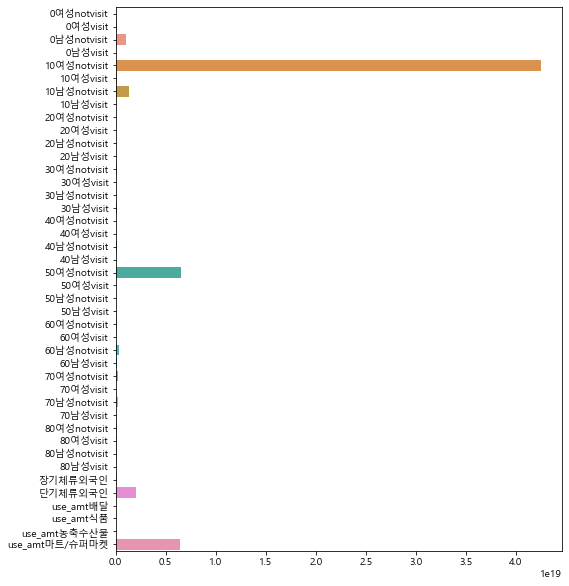

In [72]:
plt.figure(figsize=(8, 10))
sns.barplot(LGB.feature_importances_, df1.columns)
plt.show()